In [1]:
#i tried this method with multitaper spectrogram but it doesnt work. I tried updated methods, reinstalling modules and all, but still it didnt work.

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from mne.time_frequency import psd_multitaper

#Load Data
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = np.loadtxt(file)
    return data

file_path = "C:\\Users\\Aaryan Dhruva\\Desktop\\NeuroTech Task\\eeg-data.txt"
eeg_data = load_data(file_path)

from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

lowcut = 1.0  # lower cutoff frequency in Hz
highcut = 30.0  # higher cutoff frequency in Hz
fs = 100.0  # sampling frequency in Hz
order = 4  # filter order

# bandpass filter
filtered_eeg_data = bandpass_filter(eeg_data, lowcut, highcut, fs, order=order)

# PSD
frequencies, psd = welch(eeg_data, fs=sample_rate)

#Absolute Bandpowers
delta_power = np.sum(psd[(frequencies >= 1) & (frequencies < 4)])
theta_power = np.sum(psd[(frequencies >= 4) & (frequencies < 8)])
alpha_power = np.sum(psd[(frequencies >= 8) & (frequencies < 13)])
beta_power = np.sum(psd[(frequencies >= 13) & (frequencies < 30)])

#Relative Bandpowers
total_power = np.sum(psd)
delta_relative_power = delta_power / total_power
theta_relative_power = theta_power / total_power
alpha_relative_power = alpha_power / total_power
beta_relative_power = beta_power / total_power

#Multitaper Spectral Analysis
frequencies_mt, psd_mt = psd_multitaper(eeg_data, sfreq=sample_rate, fmin=0.5, fmax=30)

#Result PLotting
plt.figure(figsize=(10, 6))
plt.plot(frequencies, psd, label='PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

print("Delta relative bandpower:", delta_relative_power)
print("Theta relative bandpower:", theta_relative_power)
print("Alpha relative bandpower:", alpha_relative_power)
print("Beta relative bandpower:", beta_relative_power)


ImportError: cannot import name 'psd_multitaper' from 'mne.time_frequency' (c:\Users\Aaryan Dhruva\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\time_frequency\__init__.py)

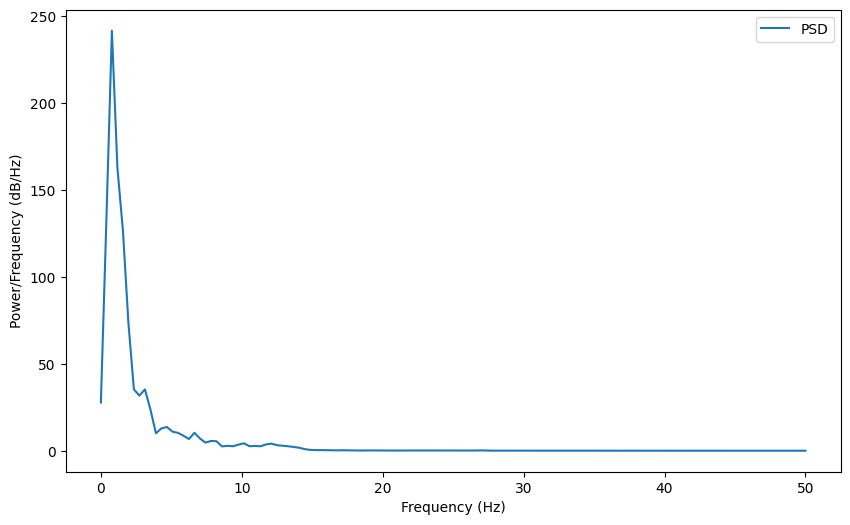

Delta relative bandpower: 0.4764704265119933
Theta relative bandpower: 0.08657675474464592
Alpha relative bandpower: 0.040820979601304985
Beta relative bandpower: 0.012333759156517762


In [ ]:
#method without MultitaperPowerSpectrogram. This method works fine.

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
#from mne.time_frequency import MultitaperPowerSpectrogram

#loading data
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = np.loadtxt(file)
    return data

file_path = r"C:\\Users\\Aaryan Dhruva\\Desktop\\NeuroTech Task\\eeg-data.txt"
eeg_data = load_data(file_path)

from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

lowcut = 1.0  # lower cutoff frequency in Hz
highcut = 30.0  # higher cutoff frequency in Hz
fs = 100.0  # sampling frequency in Hz
order = 4  # filter order

#bandpass filter
filtered_eeg_data = bandpass_filter(eeg_data, lowcut, highcut, fs, order=order)



#PSD using Welch's Method
frequencies, psd = welch(eeg_data, fs)

#Absolute Bandpowers
delta_power = np.sum(psd[(frequencies >= 1) & (frequencies < 4)])
theta_power = np.sum(psd[(frequencies >= 4) & (frequencies < 8)])
alpha_power = np.sum(psd[(frequencies >= 8) & (frequencies < 13)])
beta_power = np.sum(psd[(frequencies >= 13) & (frequencies < 30)])

#Relative Bandpowers
total_power = np.sum(psd)
delta_relative_power = delta_power / total_power
theta_relative_power = theta_power / total_power
alpha_relative_power = alpha_power / total_power
beta_relative_power = beta_power / total_power

#Result PLotting
plt.figure(figsize=(10, 6))
plt.plot(frequencies, psd, label='PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

print("Delta relative bandpower:", delta_relative_power)
print("Theta relative bandpower:", theta_relative_power)
print("Alpha relative bandpower:", alpha_relative_power)
print("Beta relative bandpower:", beta_relative_power)


In [2]:
###new approach -- even this doesnt work



import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from mne import read_raw_edf
from mne.time_frequency import psd_welch

#loading data
def load_data(file_path):
    raw = read_raw_edf(file_path, preload=True)
    return raw.get_data()

file_path = "C:\\Users\\Aaryan Dhruva\\Desktop\\NeuroTech Task\\eeg-data.txt"
eeg_data = load_data(file_path)


from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data


lowcut = 1.0  # lower cutoff frequency in Hz
highcut = 30.0  # higher cutoff frequency in Hz
fs = 100.0  # sampling frequency in Hz
order = 4  # filter order

# bandpass filter
filtered_eeg_data = bandpass_filter(eeg_data, lowcut, highcut, fs, order=order)



# PSD using Welch's Method
sfreq = 100.0  # Assuming sampling frequency of 100 Hz
frequencies, psd = psd_welch(eeg_data, fmin=0.5, fmax=30, n_fft=2048, n_per_seg=256, sfreq=sfreq)

#Absolute Bandpowers
delta_power = np.sum(psd[(frequencies >= 1) & (frequencies < 4)])
theta_power = np.sum(psd[(frequencies >= 4) & (frequencies < 8)])
alpha_power = np.sum(psd[(frequencies >= 8) & (frequencies < 13)])
beta_power = np.sum(psd[(frequencies >= 13) & (frequencies < 30)])

#Relative Bandpowers
total_power = np.sum(psd)
delta_relative_power = delta_power / total_power
theta_relative_power = theta_power / total_power
alpha_relative_power = alpha_power / total_power
beta_relative_power = beta_power / total_power

#Result PLotting
plt.figure(figsize=(10, 6))
plt.plot(frequencies, psd, label='PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.show()

print("Delta relative bandpower:", delta_relative_power)
print("Theta relative bandpower:", theta_relative_power)
print("Alpha relative bandpower:", alpha_relative_power)
print("Beta relative bandpower:", beta_relative_power)


ImportError: cannot import name 'read_raw_edf' from 'mne' (c:\Users\Aaryan Dhruva\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\__init__.py)

In [23]:
#this method uses tfrmultitaper but even this is not working. I tried everything but still cant find the bug

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from mne.time_frequency import tfr_multitaper

#loading data
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = np.loadtxt(file)
    return data

file_path = "C:\\Users\\Aaryan Dhruva\\Desktop\\NeuroTech Task\\eeg-data.txt"
eeg_data = load_data(file_path)

from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

lowcut = 1.0  # lower cutoff frequency in Hz
highcut = 30.0  # higher cutoff frequency in Hz
fs = 100.0  # sampling frequency in Hz
order = 4  # filter order

filtered_eeg_data = bandpass_filter(eeg_data, lowcut, highcut, fs, order=order)

#PSD using Welch's Method
frequencies, psd = welch(eeg_data, fs=fs)

#Absolute Bandpowers
delta_power = np.sum(psd[(frequencies >= 1) & (frequencies < 4)])
theta_power = np.sum(psd[(frequencies >= 4) & (frequencies < 8)])
alpha_power = np.sum(psd[(frequencies >= 8) & (frequencies < 13)])
beta_power = np.sum(psd[(frequencies >= 13) & (frequencies < 30)])

#Relative Bandpowers
total_power = np.sum(psd)
delta_relative_power = delta_power / total_power
theta_relative_power = theta_power / total_power
alpha_relative_power = alpha_power / total_power
beta_relative_power = beta_power / total_power

#Multitaper Spectral Analysis
freqs = np.arange(0.5, 30.5, 0.5)  # Define the frequency range for multitaper analysis
n_cycles = 2  # Number of cycles used for the Morlet wavelet
epochs=2
tfr = tfr_multitaper(
        epochs,
        freqs=freqs,
        n_cycles=n_cycles,
        time_bandwidth=4.0,
        return_itc=False,
    )

#Result PLotting
tfr.plot([0], baseline=None, mode='logratio', title='Multitaper Spectrogram', show=True, cmap='viridis')

print("Delta relative bandpower:", delta_relative_power)
print("Theta relative bandpower:", theta_relative_power)
print("Alpha relative bandpower:", alpha_relative_power)
print("Beta relative bandpower:", beta_relative_power)


TypeError: inst must be Epochs or Evoked